In [2]:
datadir = r"C:\Users\jagadesh\Jupyter Projects\DataSets\Playing cards_YOLO"

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Activation , Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input , Dense , Flatten, Conv2D, AveragePooling2D
from tensorflow.keras.models import Model
import os
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split
import cv2
from keras.optimizers import SGD
import pickle
import pandas as pd
import tensorflow as tf
import os.path
from os import path

from matplotlib import image
from matplotlib import pyplot
from PIL import Image
from numpy import asarray

from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#from keras.models import Sequential
# #from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
# from keras.layers.normalization import BatchNormalization
# from sklearn.model_selection import train_test_split
# from keras.optimizers import Adam

In [5]:
label = []
X_vector = []
IMG_SIZE = 120
for filename in os.listdir(datadir):
    if filename.endswith('jpg') or filename.endswith('JPG') :  
            image_filename = os.path.join(datadir , filename)
            filename_txt = filename[:-4]
            filename_txt = filename_txt + '.txt'
            label_filename =os.path.join(datadir , filename_txt)
            if os.path.exists(image_filename) and os.path.exists(label_filename): 
                image = cv2.imread(image_filename,cv2.IMREAD_GRAYSCALE)
                image_vector = cv2.resize(image,(IMG_SIZE,IMG_SIZE))
                #print(image_vector)
                X_vector.append(image_vector)
                label_file = open(os.path.join(datadir , filename_txt))
                label_text = label_file.read()
                #fdf= print(label_text.split())
                
                label.append(label_text.split())

X_vector_array = np.array(X_vector)
X = X_vector_array
y = np.array(label)

In [6]:
# label = []
# X_vector = []
# IMG_SIZE = 60
# for filename in os.listdir(datadir):
#     #print(filename)
#   #  try:
#         if filename.endswith('jpg') or filename.endswith('JPG') :  
#             image_filename = os.path.join(datadir , filename)
#             filename_txt = filename[:-4]
#             filename_txt = filename_txt + '.txt'
#             label_filename =os.path.join(datadir , filename_txt)
#             if os.path.exists(image_filename) and os.path.exists(label_filename): 

#     #             image = Image.open(image_filename)
#                 #image = i
#                 #new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
#                 # convert image to numpy array
#                 image = cv2.imread(image_filename,cv2.IMREAD_GRAYSCALE)
#                 #image_vector = asarray(image)
#                 image_vector = cv2.resize(image,(IMG_SIZE,IMG_SIZE))
#                 print(image_vector)
#                 X_vector.append(image_vector)
#                 #filename.endswith('txt'):
#                 label_file = open(os.path.join(datadir , filename_txt))
#                 label_text = label_file.read()
#                 print(label_text.split())
#                 label.append(label_text.split())
# #     except:
# #         print('error')
# #         pass
                   
        


In [7]:
# #type(image_vector)
# #print(image_vector.shape)
# X_vector_array = np.array(X_vector)
# X = X_vector_array
# y = np.array(label)
# #print(X_vector_array.shape)
# # print(X.shape)
#print(y.shape)
#print(X[1])
#print(y[1])
#y = np.transpose(y)
print(X.shape)
print(y.shape)


(51, 120, 120)
(51, 5)


In [8]:
# import random
# z = []
# for i in range(51):
#     z.append(random.randrange(1, 4))
#     random.randrange(3, 9)
# print(z)
# len(z)
# z = np.array(z)
# print(z.shape)

In [9]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, random_state=42)

In [10]:
y_train


array([['16', '0.202899', '0.423469', '0.231884', '0.193878'],
       ['16', '0.229167', '0.430233', '0.270833', '0.209302'],
       ['18', '0.209184', '0.441176', '0.255102', '0.205882'],
       ['18', '0.217172', '0.439850', '0.272727', '0.203008'],
       ['16', '0.227723', '0.452555', '0.237624', '0.204380'],
       ['15', '0.238095', '0.451852', '0.247619', '0.207407'],
       ['17', '0.215278', '0.422680', '0.263889', '0.206186'],
       ['17', '0.207143', '0.426316', '0.271429', '0.200000'],
       ['15', '0.229592', '0.447368', '0.275510', '0.203008'],
       ['15', '0.188172', '0.438849', '0.290323', '0.201439'],
       ['16', '0.247525', '0.443609', '0.237624', '0.195489'],
       ['17', '0.247525', '0.438406', '0.257426', '0.181159'],
       ['18', '0.224490', '0.439850', '0.265306', '0.203008'],
       ['16', '0.208333', '0.429630', '0.250000', '0.192593'],
       ['18', '0.204082', '0.444444', '0.265306', '0.207407'],
       ['16', '0.230392', '0.442308', '0.245098', '0.20

In [11]:
y_ind_train=[]
y_bb_train= []
y_ind_test=[]
y_bb_test= []
for i in y_train:
    #print(i[0])
    k = int(i[0]) - 15
    y_ind_train.append(k)
    y_bb_train.append([float(i[1]),float(i[2]),float(i[3]),float(i[4])])
for i in y_test:
    #print(i[0])
    t = int(i[0]) - 15
    y_ind_test.append(t)
    y_bb_test.append([float(i[1]),float(i[2]),float(i[3]),float(i[4])])
y_bb_train = np.array(y_bb_train)
y_ind_train = np.array(y_ind_train)
y_bb_test = np.array(y_bb_test)
y_ind_test = np.array(y_ind_test)

In [12]:
y_bb_train = np.array(y_bb_train)
y_ind_train = np.array(y_ind_train)
print(type(y_ind_train[1]))
print(type(y_bb_train[1][1]))
#print(y_bb_train)
#print(y_ind_train)


<class 'numpy.int32'>
<class 'numpy.float64'>


In [13]:
inputs = Input(shape = (120,120,1))
h = Conv2D (1,(3,3), activation = 'relu')(inputs)
h = Conv2D (10,(3,3), activation = 'relu')(h)
#h = AveragePooling2D(3)(h)
h = Flatten()(h)

outputs = Dense(5,activation = 'softmax',name = 'outputs')(h)
aux_output = Dense(4,activation = 'linear',name = 'aux_output')(h)

model_func = Model(inputs = inputs, outputs = [outputs,aux_output])

model_func.compile(loss = ['sparse_categorical_crossentropy', 'mse'], loss_weights = [1,0.5],metrics = ['accuracy'])

history = model_func.fit([X_train],[y_ind_train,y_bb_train],epochs=250)



Epoch 1/250
2/2 [==============================] - 0s 35ms/step - loss: 2261009.2500 - outputs_loss: 393.4654 - aux_output_loss: 4521231.5000 - outputs_accuracy: 0.0889 - aux_output_accuracy: 0.2889
Epoch 2/250
2/2 [==============================] - 0s 37ms/step - loss: 3249.1614 - outputs_loss: 2959.9744 - aux_output_loss: 578.3743 - outputs_accuracy: 0.3333 - aux_output_accuracy: 0.0222
Epoch 3/250
2/2 [==============================] - 0s 39ms/step - loss: 988.6165 - outputs_loss: 946.6071 - aux_output_loss: 84.0187 - outputs_accuracy: 0.3778 - aux_output_accuracy: 0.2889
Epoch 4/250
2/2 [==============================] - 0s 32ms/step - loss: 702.1385 - outputs_loss: 666.1489 - aux_output_loss: 71.9793 - outputs_accuracy: 0.2444 - aux_output_accuracy: 0.2444
Epoch 5/250
2/2 [==============================] - 0s 34ms/step - loss: 1196.3673 - outputs_loss: 1163.4424 - aux_output_loss: 65.8499 - outputs_accuracy: 0.2667 - aux_output_accuracy: 0.2889
Epoch 6/250
2/2 [===================

2/2 [==============================] - 0s 34ms/step - loss: 128.2120 - outputs_loss: 0.0000e+00 - aux_output_loss: 256.4240 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.1778
Epoch 44/250
2/2 [==============================] - 0s 33ms/step - loss: 107.5417 - outputs_loss: 0.0000e+00 - aux_output_loss: 215.0833 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.2222
Epoch 45/250
2/2 [==============================] - 0s 32ms/step - loss: 92.3392 - outputs_loss: 0.0000e+00 - aux_output_loss: 184.6784 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.2000
Epoch 46/250
2/2 [==============================] - 0s 32ms/step - loss: 82.3866 - outputs_loss: 0.0000e+00 - aux_output_loss: 164.7732 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.2444
Epoch 47/250
2/2 [==============================] - 0s 33ms/step - loss: 100.5494 - outputs_loss: 0.0000e+00 - aux_output_loss: 201.0989 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.3111
Epoch 48/250
2/2 [===========================

2/2 [==============================] - 0s 32ms/step - loss: 187.8399 - outputs_loss: 3.8611e-05 - aux_output_loss: 375.6797 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.0000e+00
Epoch 86/250
2/2 [==============================] - 0s 31ms/step - loss: 261.4962 - outputs_loss: 2.7797e-04 - aux_output_loss: 522.9919 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.0000e+00
Epoch 87/250
2/2 [==============================] - 0s 32ms/step - loss: 37.4058 - outputs_loss: 1.0189e-04 - aux_output_loss: 74.8113 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.0000e+00
Epoch 88/250
2/2 [==============================] - 0s 33ms/step - loss: 9.9880 - outputs_loss: 1.1445e-04 - aux_output_loss: 19.9758 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.0444
Epoch 89/250
2/2 [==============================] - 0s 31ms/step - loss: 5.6660 - outputs_loss: 9.6705e-05 - aux_output_loss: 11.3318 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.0222
Epoch 90/250
2/2 [=====================

Epoch 128/250
2/2 [==============================] - 0s 30ms/step - loss: 0.8431 - outputs_loss: 0.0070 - aux_output_loss: 1.6723 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.5778
Epoch 129/250
2/2 [==============================] - 0s 35ms/step - loss: 0.9453 - outputs_loss: 0.0054 - aux_output_loss: 1.8798 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.4667
Epoch 130/250
2/2 [==============================] - 0s 33ms/step - loss: 3.7881 - outputs_loss: 0.0111 - aux_output_loss: 7.5540 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.3111
Epoch 131/250
2/2 [==============================] - 0s 30ms/step - loss: 3.1062 - outputs_loss: 0.0386 - aux_output_loss: 6.1353 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.5556
Epoch 132/250
2/2 [==============================] - 0s 35ms/step - loss: 2.0124 - outputs_loss: 0.0828 - aux_output_loss: 3.8591 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.3111
Epoch 133/250
2/2 [==============================] - 0s 33ms/step

2/2 [==============================] - 0s 33ms/step - loss: 0.3355 - outputs_loss: 0.0431 - aux_output_loss: 0.5848 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.7333
Epoch 172/250
2/2 [==============================] - 0s 31ms/step - loss: 0.2974 - outputs_loss: 0.0141 - aux_output_loss: 0.5666 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.8000
Epoch 173/250
2/2 [==============================] - 0s 33ms/step - loss: 0.6687 - outputs_loss: 0.0525 - aux_output_loss: 1.2323 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.5556
Epoch 174/250
2/2 [==============================] - 0s 31ms/step - loss: 0.3460 - outputs_loss: 0.0365 - aux_output_loss: 0.6188 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.6889
Epoch 175/250
2/2 [==============================] - 0s 34ms/step - loss: 0.1393 - outputs_loss: 0.0129 - aux_output_loss: 0.2528 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.6667
Epoch 176/250
2/2 [==============================] - 0s 34ms/step - loss: 0.119

2/2 [==============================] - 0s 37ms/step - loss: 0.1193 - outputs_loss: 0.0424 - aux_output_loss: 0.1537 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.9111
Epoch 215/250
2/2 [==============================] - 0s 34ms/step - loss: 0.0842 - outputs_loss: 0.0090 - aux_output_loss: 0.1502 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.8000
Epoch 216/250
2/2 [==============================] - 0s 34ms/step - loss: 0.0372 - outputs_loss: 0.0023 - aux_output_loss: 0.0699 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.9111
Epoch 217/250
2/2 [==============================] - 0s 32ms/step - loss: 0.0393 - outputs_loss: 0.0020 - aux_output_loss: 0.0747 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.6667
Epoch 218/250
2/2 [==============================] - 0s 34ms/step - loss: 0.0995 - outputs_loss: 0.0040 - aux_output_loss: 0.1910 - outputs_accuracy: 1.0000 - aux_output_accuracy: 0.8444
Epoch 219/250
2/2 [==============================] - 0s 35ms/step - loss: 0.145

In [14]:
model_func.predict(
    X_test,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)


[array([[3.2741785e-01, 2.1410644e-01, 1.0590601e-01, 2.9201689e-01,
         6.0552798e-02],
        [1.3939149e-06, 1.0722243e-07, 9.9999845e-01, 3.5810558e-08,
         5.3943050e-10],
        [2.4492939e-26, 2.1632989e-09, 1.0000000e+00, 1.3420302e-19,
         1.5130193e-32],
        [1.7788899e-01, 4.1859169e-02, 2.3025690e-01, 5.0351530e-01,
         4.6479639e-02],
        [9.3685657e-01, 1.1435502e-02, 2.1356814e-02, 2.3142906e-02,
         7.2082682e-03],
        [4.1257894e-01, 2.2847600e-01, 4.0955260e-02, 2.8014487e-01,
         3.7844811e-02]], dtype=float32),
 array([[ 0.14546157,  0.06524771, -0.06323047, -0.07485711],
        [ 0.69950354,  0.9583918 ,  0.6543725 ,  0.39622304],
        [ 1.7594322 ,  1.7487005 ,  0.9747716 , -0.23128614],
        [ 0.09024897,  0.13374788, -0.07366316, -0.01767076],
        [ 0.10865545,  0.00296028, -0.00329807,  0.05551051],
        [ 0.13859388,  0.13595709, -0.0228194 , -0.04683838]],
       dtype=float32)]

In [15]:
loss, main_loss, aux_loss, main_acc, aux_acc = model_func.evaluate(X_test,
                                (y_ind_test, y_bb_test),
                                batch_size=5)

2/2 [==============================] - 0s 5ms/step - loss: 10.6867 - outputs_loss: 10.5495 - aux_output_loss: 0.2745 - outputs_accuracy: 0.5000 - aux_output_accuracy: 0.3333


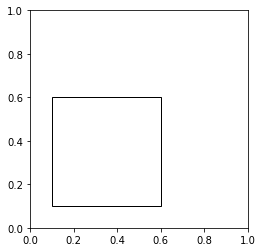

In [17]:
sevenspade = r"C:\Users\jagadesh\Jupyter Projects\DataSets\Playing cards_YOLO/7s.jpg"

In [200]:
seven_image = cv2.imread(sevenspade,cv2.IMREAD_GRAYSCALE)
seven_vector = cv2.resize(seven_image,(IMG_SIZE,IMG_SIZE))
seven_vector = np.array(seven_vector)
#print(image_vector)
#seven_vector.append(seven_vector)
print(seven_vector.shape)
                
print(X_train[1].shape)
                

(60, 60)
(60, 60)


In [23]:
predicted_1 = model_func.predict(
    X_test,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
print(predicted_1)

[array([[3.2741785e-01, 2.1410644e-01, 1.0590601e-01, 2.9201689e-01,
        6.0552798e-02],
       [1.3939149e-06, 1.0722243e-07, 9.9999845e-01, 3.5810558e-08,
        5.3943050e-10],
       [2.4492939e-26, 2.1632989e-09, 1.0000000e+00, 1.3420302e-19,
        1.5130193e-32],
       [1.7788899e-01, 4.1859169e-02, 2.3025690e-01, 5.0351530e-01,
        4.6479639e-02],
       [9.3685657e-01, 1.1435502e-02, 2.1356814e-02, 2.3142906e-02,
        7.2082682e-03],
       [4.1257894e-01, 2.2847600e-01, 4.0955260e-02, 2.8014487e-01,
        3.7844811e-02]], dtype=float32), array([[ 0.14546157,  0.06524771, -0.06323047, -0.07485711],
       [ 0.69950354,  0.9583918 ,  0.6543725 ,  0.39622304],
       [ 1.7594322 ,  1.7487005 ,  0.9747716 , -0.23128614],
       [ 0.09024897,  0.13374788, -0.07366316, -0.01767076],
       [ 0.10865545,  0.00296028, -0.00329807,  0.05551051],
       [ 0.13859388,  0.13595709, -0.0228194 , -0.04683838]],
      dtype=float32)]


In [246]:
y_ind_train

array([1, 1, 3, 3, 1, 0, 2, 2, 0, 0, 1, 2, 3, 1, 3, 1, 0, 3, 1, 3, 3, 0,
       2, 0, 3, 1, 2, 2, 1, 1, 2, 0, 0, 3, 2, 2, 2, 2, 3, 0, 3, 3, 2, 1,
       3])

In [207]:
y_bb_test[1]
X_test[4]

array([0.242574, 0.441606, 0.247525, 0.19708 ])

In [79]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

w, h = 60 , 60
#data = np.zeros((h, w, 3), dtype=np.uint8)
#data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
img = Image.fromarray(X_train[1])
img.save('my.jpg')
#img.show()


# get an image
im = Image.open('my.jpg').convert('RGBA')

draw = ImageDraw.Draw(im)

width = predicted_1[1][1][2] * ( predicted_1[1][1][2] + predicted_1[1][1][3] )

xx= predicted_1[1][1][0]
yy= predicted_1[1][1][1]
ww= predicted_1[1][1][2]
hh= predicted_1[1][1][3]


#rectangle([0.202899, 0.423469, 0.231884, 0.193878], fill=None, outline=None, width=1)
draw.rectangle(((0.231884 * 0.20289, 0.193878*0.423469), (0.202899 + 0.231884 * 0.20289, 0.423469 + 0.193878*0.423469)), outline="#ff8888")
del draw
im.show()


In [78]:
print(width)
print(predicted_1[1][1][2])

0.6874808
0.6543725


In [67]:
#'0.202899', '0.423469', '0.231884', '0.193878'
#boundsb = 0.202899  0.423469  0.231884   0.193878
#plt.Bbox.from_bounds(0.202899,0.423469,0.231884,0.193878)

In [ ]:
# for c in contours:
#     # get the bounding rect
#     x, y, w, h = cv2.boundingRect(c)
#     # draw a green rectangle to visualize the bounding rect
#     cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)



# fig2 = plt.figure()
# ax2 = fig2.add_subplot(111, aspect='equal')

# ax2.add_patch(
#      patches.Rectangle(
#         (0.1, 0.1),
#         0.5,
#         0.5,
#         fill=False      # remove background
#      ) ) 
# fig2.savefig('rect2.png', dpi=90, bbox_inches='tight')

In [82]:
from PIL import Image, ImageDraw, ImageFont
# get an image
im = Image.open('my.jpg')

draw = ImageDraw.Draw(im)
draw.rectangle(((200, 200), (100, 100)), outline="#ff8888")
del draw
im.show()


In [33]:
X_train[1]

array([[66, 74, 73, ..., 64, 67, 68],
       [70, 73, 72, ..., 61, 60, 65],
       [73, 69, 70, ..., 72, 61, 62],
       ...,
       [68, 64, 61, ..., 69, 70, 71],
       [69, 65, 62, ..., 64, 65, 65],
       [65, 65, 68, ..., 65, 65, 68]], dtype=uint8)

In [35]:
y_bb_train[1]

array([0.229167, 0.430233, 0.270833, 0.209302])

In [56]:
    def rectangle(self, xy, fill=None, outline=None, width=1):
        """Draw a rectangle."""
        ink, fill = self._getink(outline, fill)
        if fill is not None:
            self.draw.draw_rectangle(xy, fill, 1)
        if ink is not None and ink != fill and width != 0:
            self.draw.draw_rectangle(xy, ink, 0, width)


In [ ]:
def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
